# Task 6.1: ELECTRE for choice problems

This notebook is prepared to practise with the model of outranking in MCDA. The method used is ELECTRE-I for choice (based on kernel). Deliver the report in the virtual campus.

This exercise is about choosing a cruise for our next holidays.



In [21]:
%pip install mcda==0.4.1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=69114) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


  Using cached mcda-0.4.1-py3-none-any.whl.metadata (2.0 kB)
Using cached mcda-0.4.1-py3-none-any.whl (58 kB)
  Attempting uninstall: mcda
    Found existing installation: mcda 0.4.0
    Uninstalling mcda-0.4.0:
      Successfully uninstalled mcda-0.4.0

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
from mcda.core.performance_table import *
from mcda.core.scales import *
from mcda.plot import *
from mcda.core.matrices import AdjacencyMatrix
from mcda.outranking.electre import *

Criteria: Capacity (number of people), Company (rating of quality), Facilities (number of additional services), Duration (days of the cruise) and Reviews (averages score of user's ratings).

The alternatives are:

*   Id0: MED- Cruise on the Mediterranean
*   Id1 : BALT - Cruise on Baltic Sea
*   Id2 : CARIB - Cruise at the Caribean coast
*   Id3 : GRE - Cruise in the Greek islands
*   Id4 : NIL - Cruise in the Nile river
*   Id5 : DAN - Cruise in the Danube river

Q1. Data is defined below. Weights indicate the relative importance of each criterion in the concordance calculation. What can you say about the weights with respect to the interests of the user?


In this implementation of ELECTRE-I, it is required to define the scale of each criterion. There are quantitative (numerical) and qualitative (categorical) scales. This example uses only quantitative values. For each scale you must indicate the minimum possible value, the maximum one and the preference direction (MAX or MIN). A vector with the scales is needed as parameter in the ELECTRE functions.


In [14]:
scales = {
    "Capacity": QuantitativeScale(200, 1500, PreferenceDirection.MAX),
    "Company": QuantitativeScale(1, 10, PreferenceDirection.MAX),
    "Facilities": QuantitativeScale(1, 5, PreferenceDirection.MAX),
    "Duration": QuantitativeScale(5, 20, PreferenceDirection.MAX),
    "Reviews": QuantitativeScale(1, 10, PreferenceDirection.MAX)
}

In [15]:
alternatives = ["0.MED", "1.BALT", "2.CARIB", "3.GRE", "4.NIL", "5.DAN"]
criteria = {
    "Capacity": 0.2,
    "Company": 0.2,
    "Facilities": 0.1,
    "Duration": 0.3,
    "Reviews": 0.2
    }

performance_table = PerformanceTable(
                    [[900, 8, 5, 5, 3],
                     [1200, 9, 4, 10, 5],
                     [400, 7, 3, 14, 7],
                     [1000, 4, 2, 15, 9],
                     [700, 2, 5, 8, 9],
                     [1400, 7, 3, 14, 6]],
                     alternatives = alternatives,
                     criteria = criteria,
                     scales = scales)

performance_table.df

,Capacity,Company,Facilities,Duration,Reviews
0.MED,900,8,5,5,3
1.BALT,1200,9,4,10,5
2.CARIB,400,7,3,14,7
3.GRE,1000,4,2,15,9
4.NIL,700,2,5,8,9
5.DAN,1400,7,3,14,6


Q2. The ELECTRE-1 uses binary concordance for each criterion and then applies the weights.
Reproduce manually the concordance between MED and BALT. (Corrected)

,0.MED,1.BALT,2.CARIB,3.GRE,4.NIL,5.DAN
0.MED,1.0,0.1,0.5,0.3,0.5,0.3
1.BALT,0.9,1.0,0.5,0.5,0.7,0.3
2.CARIB,0.5,0.5,1.0,0.3,0.5,0.8
3.GRE,0.7,0.5,0.7,1.0,0.9,0.5
4.NIL,0.6,0.3,0.5,0.3,1.0,0.3
5.DAN,0.7,0.7,0.8,0.5,0.7,1.0


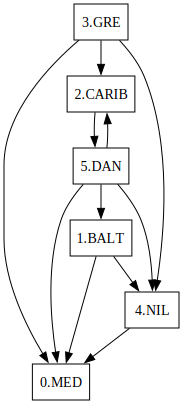

In [17]:
electre1 = Electre1(criteria_weights=criteria, c_hat=0.6, d_hat=0.4)
concordance_matrix = electre1.concordance(performance_table)

display(concordance_matrix)

#Now we plot the graph of concordance with relations above the cut threshold
cut_threshold = 0.6
conc_mat_cut = concordance_matrix.where(concordance_matrix >= cut_threshold, other=0)
AdjacencyMatrix(conc_mat_cut).plot()



Q3. After the concordance, the method calculates the discordance in a boolean way too. In this implementation, the discordance is calculated as a proportion of the maximum difference between two values on each criterion. A negative value means no discordance at all. Find a case with maximum discordance and explain why it happens.



In [18]:
discordance_matrix = electre1.discordance(performance_table)
discordance_matrix

,0.MED,1.BALT,2.CARIB,3.GRE,4.NIL,5.DAN
0.MED,0.000,0.300,0.009,0.100,0.006,0.5
1.BALT,0.001,0.000,0.004,0.005,0.004,0.2
2.CARIB,0.500,0.800,0.000,0.600,0.300,1.0
3.GRE,0.004,0.200,0.003,0.000,0.003,0.4
4.NIL,0.200,0.500,0.006,0.300,0.000,0.7
5.DAN,0.002,0.002,0.001,0.003,0.003,0.0


Next. The credibility step merges concordance with discordance using two thresholds. It is one if concordance is >= c_hat and discordance is <=d_hat.



In [19]:
credibility_matrix = electre1.construct(performance_table)
credibility_matrix.df

,0.MED,1.BALT,2.CARIB,3.GRE,4.NIL,5.DAN
0.MED,1.0,0.0,0.0,0.0,0.0,0.0
1.BALT,1.0,1.0,0.0,0.0,1.0,0.0
2.CARIB,0.0,0.0,1.0,0.0,0.0,0.0
3.GRE,1.0,0.0,1.0,1.0,1.0,0.0
4.NIL,1.0,0.0,0.0,0.0,1.0,0.0
5.DAN,1.0,1.0,1.0,0.0,1.0,1.0



The following code executes the exploitation method of ELECTRE-I to find the kernel.

Q4. Draw the graph of credibility and find the kernel manually. Check the results with the ones given by the software.


In [20]:
kernel = electre1.exploit(credibility_matrix)
kernel


['3.GRE', '5.DAN']